In [1]:
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


In [2]:
data_dir = pathlib.Path("D:\Maths project\Datasets")
data_dir

WindowsPath('D:/Maths project/Datasets')

In [3]:
image_count = len(list(data_dir.glob("*/*.JPG")))
image_count

284

In [4]:
skin_cancer_images_dict = {
    'cancer': list(data_dir.glob('Cancer/*')),
    'non_cancer': list(data_dir.glob('Non_Cancer/*'))
}

skin_cancer_label_dict = {
    'cancer': 0,
    'non_cancer': 1
}

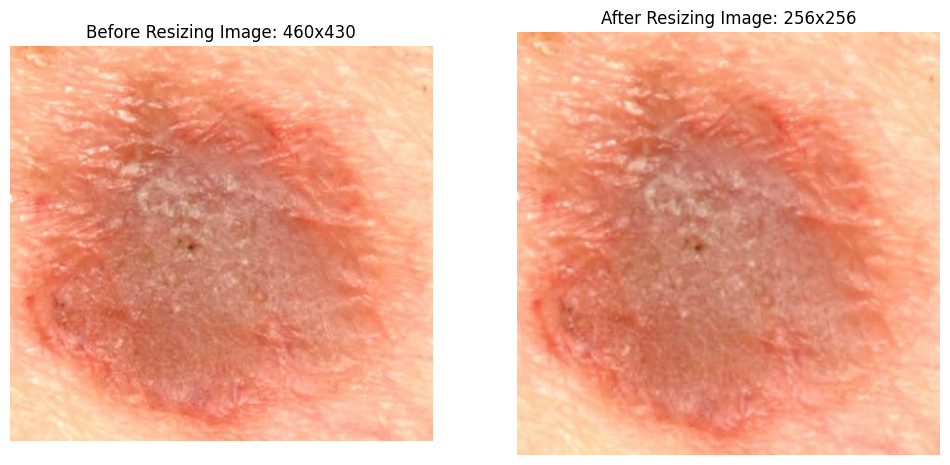

In [5]:
import cv2
import matplotlib.pyplot as plt

image_path = r"Datasets\Non_Cancer\35.JPG"
image_before_scaling = cv2.imread(image_path)

original_height, original_width, _ = image_before_scaling.shape

target_size = (256, 256)
image_after_scaling = cv2.resize(image_before_scaling, target_size)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title(f'Before Resizing Image: {original_width}x{original_height}')
plt.imshow(cv2.cvtColor(image_before_scaling, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f'After Resizing Image: {target_size[0]}x{target_size[1]}')
plt.imshow(cv2.cvtColor(image_after_scaling, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


In [5]:
X, y = [], []

for input_image, images in skin_cancer_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        img = cv2.resize(img, (180, 180))
        X.append(img)
        y.append(skin_cancer_label_dict[input_image])


In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=35)

In [21]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [22]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

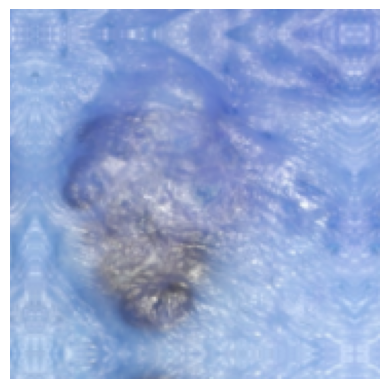

In [23]:

plt.axis("off")
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [24]:
num_classes = 2

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes)
])

model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])



In [28]:
history  = model.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
8/8 [==============================] - 3s 405ms/step - loss: 0.3852 - accuracy: 0.7912
Epoch 2/20
8/8 [==============================] - 3s 417ms/step - loss: 0.4049 - accuracy: 0.8153
Epoch 3/20
8/8 [==============================] - 3s 422ms/step - loss: 0.4067 - accuracy: 0.8233
Epoch 4/20
8/8 [==============================] - 3s 405ms/step - loss: 0.3948 - accuracy: 0.8514
Epoch 5/20
8/8 [==============================] - 3s 419ms/step - loss: 0.4124 - accuracy: 0.7992
Epoch 6/20
8/8 [==============================] - 3s 397ms/step - loss: 0.3709 - accuracy: 0.8394
Epoch 7/20
8/8 [==============================] - 3s 384ms/step - loss: 0.3926 - accuracy: 0.8353
Epoch 8/20
8/8 [==============================] - 3s 376ms/step - loss: 0.3650 - accuracy: 0.8474
Epoch 9/20
8/8 [==============================] - 3s 376ms/step - loss: 0.3671 - accuracy: 0.8514
Epoch 10/20
8/8 [==============================] - 3s 370ms/step - loss: 0.4102 - accuracy: 0.8112
Epoch 11/20
8/8 [==

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

2/2 [==============================] - 0s 16ms/step


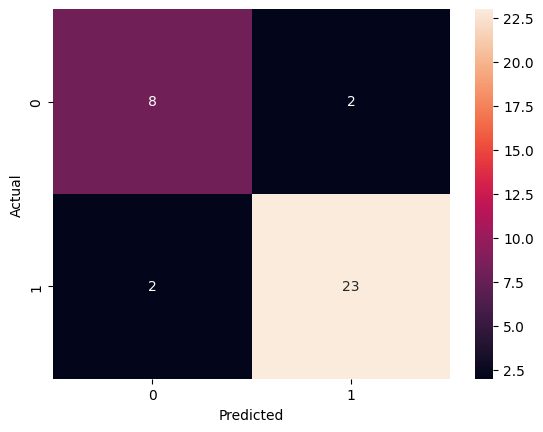

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions.argmax(axis=1))

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
